<a href="https://colab.research.google.com/github/Kiogora/OpenHAPv2/blob/main/software/measurementNormalization/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Update libraries 

In [1]:
!pip install --upgrade plotly

     |████████████████████████████████| 20.6MB 1.3MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


# Import required libraries

In [2]:
import pandas as pd;
import numpy as np;
import plotly.express as px;
import statsmodels.api as sm;
import matplotlib.pyplot as plt;

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Define data fields as used in data capture

In [3]:
command_sent_time_txt = "Command sent time(UTC)"
measurement_received_time_txt = "Measurement received time (UTC)"
device_field_txt = "Device"
device_time_field_txt = "Device time (UTC)"
measurement_field_txt = "Particulate measurement"
connected_openhap_units_field_txt = "Connected OpenHAP units"

# Read the input data capture file

In [6]:
target_100ug_df=pd.read_csv('chamberTest_target_100ug.csv')
target_500ug_df=pd.read_csv('chamberTest_target_500ug.csv')
target_800ug_df=pd.read_csv('chamberTest_target_800ug.csv')

# Show sample data from various measurement phases

In [7]:
target_100ug_df.head()

Command sent time(UTC)  ... Connected OpenHAP units
0    2021-06-24 12:36:47  ...                      19
1    2021-06-24 12:36:47  ...                      19
2    2021-06-24 12:36:47  ...                      19
3    2021-06-24 12:36:47  ...                      19
4    2021-06-24 12:36:47  ...                      19

[5 rows x 6 columns]

In [8]:
target_500ug_df.head()

Command sent time(UTC)  ... Connected OpenHAP units
0    2021-06-24 14:15:05  ...                      21
1    2021-06-24 14:15:05  ...                      21
2    2021-06-24 14:15:05  ...                      21
3    2021-06-24 14:15:05  ...                      21
4    2021-06-24 14:15:05  ...                      21

[5 rows x 6 columns]

In [9]:
target_800ug_df.head()

Command sent time(UTC)  ... Connected OpenHAP units
0    2021-06-24 15:14:14  ...                      21
1    2021-06-24 15:14:14  ...                      21
2    2021-06-24 15:14:14  ...                      21
3    2021-06-24 15:14:14  ...                      21
4    2021-06-24 15:14:14  ...                      21

[5 rows x 6 columns]

# Define data types

In [10]:
target_100ug_df[command_sent_time_txt] = pd.to_datetime(target_100ug_df[command_sent_time_txt])
target_100ug_df[measurement_received_time_txt] = pd.to_datetime(target_100ug_df[measurement_received_time_txt])
target_100ug_df[device_time_field_txt] = pd.to_datetime(target_100ug_df[device_time_field_txt])
target_100ug_df[measurement_field_txt]= target_100ug_df[measurement_field_txt].astype(float)

In [11]:
target_500ug_df[command_sent_time_txt] = pd.to_datetime(target_500ug_df[command_sent_time_txt])
target_500ug_df[measurement_received_time_txt] = pd.to_datetime(target_500ug_df[measurement_received_time_txt])
target_500ug_df[device_time_field_txt] = pd.to_datetime(target_500ug_df[device_time_field_txt])
target_500ug_df[measurement_field_txt]= target_500ug_df[measurement_field_txt].astype(float)

In [12]:
target_800ug_df[command_sent_time_txt] = pd.to_datetime(target_800ug_df[command_sent_time_txt])
target_800ug_df[measurement_received_time_txt] = pd.to_datetime(target_800ug_df[measurement_received_time_txt])
target_800ug_df[device_time_field_txt] = pd.to_datetime(target_800ug_df[device_time_field_txt])
target_800ug_df[measurement_field_txt]= target_800ug_df[measurement_field_txt].astype(float)

# Pivot the data

In [13]:
target_100ug_df=target_100ug_df.pivot_table(index=command_sent_time_txt, columns=device_field_txt, values=measurement_field_txt)

In [14]:
target_500ug_df=target_500ug_df.pivot_table(index=command_sent_time_txt, columns=device_field_txt, values=measurement_field_txt)

In [15]:
target_800ug_df=target_800ug_df.pivot_table(index=command_sent_time_txt, columns=device_field_txt, values=measurement_field_txt)

In [16]:
target_100ug_df.head()

Device                  40:f5:20:5b:20:bc  ...  40:f5:20:5b:21:d8
Command sent time(UTC)                     ...                   
2021-06-24 12:36:47                  5.65  ...               4.80
2021-06-24 12:36:55                  5.80  ...               4.75
2021-06-24 12:37:04                  5.65  ...               4.90
2021-06-24 12:37:12                  5.50  ...               4.85
2021-06-24 12:37:20                  5.50  ...               4.95

[5 rows x 20 columns]

In [20]:
target_500ug_df.head()

Device                  40:f5:20:5b:20:bc  ...  40:f5:20:5b:21:d8
Command sent time(UTC)                     ...                   
2021-06-24 14:15:05                  6.95  ...               6.20
2021-06-24 14:15:13                  7.25  ...               6.15
2021-06-24 14:15:21                  7.30  ...               6.15
2021-06-24 14:15:30                  7.00  ...               6.20
2021-06-24 14:15:38                  7.20  ...               6.20

[5 rows x 20 columns]

In [21]:
target_800ug_df.head()

Device                  40:f5:20:5b:20:bc  ...  40:f5:20:5b:21:d8
Command sent time(UTC)                     ...                   
2021-06-24 15:14:14                  8.40  ...               7.50
2021-06-24 15:14:22                  8.40  ...               7.60
2021-06-24 15:14:30                  8.30  ...               7.70
2021-06-24 15:14:38                  8.35  ...               7.65
2021-06-24 15:14:47                  8.40  ...               7.65

[5 rows x 20 columns]

# Plot the each experiment phase data on an interactive graph

Plot 100 μg/m<sup>3</sup> target experiment data

In [17]:
px.line(target_100ug_df)

Plot 500 μg/m<sup>3</sup> target experiment phase data

In [18]:
px.line(target_500ug_df)

Plot 800 μg/m<sup>3</sup> target experiment phase data

In [19]:
px.line(target_800ug_df)

# Extract the data during the stable phases of each experiment


## Extract baseline data

We extract 20 minutes of data between 12:30 to 12:49 UTC for baseline data and linearly interpolate for missed datapoints.

In [54]:
start = "2021-06-24 12:40"
end = "2021-06-24 12:59"
df = target_100ug_df

masked_baseline_df = df.loc[start:end].interpolate()
px.line(masked_baseline_df)

Inspect number of datapoints as the number per experiment phase is directly proportional to the relative weight of contribution into the subsequent regression procedure

In [55]:
print(f"{masked_baseline_df.shape[0]} timepoints extracted")

141 timepoints extracted


## Extract 100 μg/m<sup>3</sup> target data

We extract 20 minutes of data between 13:32 to 13:51 UTC for the 100 μg/m<sup>3</sup> target experiment phase data and linearly interpolate for missed datapoints.

In [35]:
start = "2021-06-24 13:32"
end = "2021-06-24 13:51"
df = target_100ug_df

masked_target_100ug_df = df.loc[start:end].interpolate()
px.line(masked_target_100ug_df)

Inspect number of datapoints as the number per experiment phase is directly proportional to the relative weight of contribution into the subsequent regression procedure

In [40]:
print(f"{masked_target_100ug_df.shape[0]} timepoints extracted")

142 timepoints extracted


## Extract 500 μg/m3 target data

We extract 20 minutes of data between 14:30 to 14:49 UTC for the 500 μg/m<sup>3</sup> target experiment phase data and linearly interpolate for missed datapoints.

In [33]:
start = "2021-06-24 14:30"
end = "2021-06-24 14:49"
df = target_500ug_df

masked_target_500ug_df = df.loc[start:end].interpolate()
px.line(masked_target_500ug_df)

Inspect number of datapoints as the number per experiment phase is directly proportional to the relative weight of contribution into the subsequent regression procedure

In [41]:
print(f"{masked_target_100ug_df.shape[0]} timepoints extracted")

142 timepoints extracted


## Extract 800 μg/m3 target data

We extract 20 minutes of data between 15:30 to 15:49 UTC for the 800 μg/m<sup>3</sup> target experiment phase data and linearly interpolate for missed datapoints.

In [36]:
start = "2021-06-24 15:30"
end = "2021-06-24 15:49"
df = target_800ug_df

masked_target_800ug_df = df.loc[start:end].interpolate()
px.line(masked_target_800ug_df)

Inspect number of datapoints as the number per experiment phase is directly proportional to the relative weight of contribution into the subsequent regression procedure

In [42]:
print(f"{masked_target_100ug_df.shape[0]} timepoints extracted")

142 timepoints extracted


# Concatenate all stable phase datasets 

We perform this in order to process the data over the entire baseline to 800 μg/m<sup>3</sup> measurement range supported by the SDS011 sensor

In [56]:
concat_df = pd.concat([masked_baseline_df, masked_target_100ug_df, masked_target_500ug_df, masked_target_800ug_df])

In [57]:
concat_df.head()

Device                  40:f5:20:5b:20:bc  ...  40:f5:20:5b:21:d8
Command sent time(UTC)                     ...                   
2021-06-24 12:40:04                  6.10  ...               4.40
2021-06-24 12:40:13                  5.90  ...               4.30
2021-06-24 12:40:21                  5.70  ...               4.15
2021-06-24 12:40:29                  5.75  ...               4.30
2021-06-24 12:40:37                  5.60  ...               4.40

[5 rows x 20 columns]

# Plot box diagram

To visualize particulate measurement districution in the stable experimental phase

In [58]:
px.box(concat_df)

# Plot correlation heatmap

In [59]:
correlation_mat=concat_df.corr()
px.imshow(correlation_mat, x=list(correlation_mat.columns), y=list(correlation_mat.index), width=1200, height=800)

# Calculate the area under the curve and obtain the *median*

We accomplish this with the trapezoidal rule as the method implicitly performs linear interpolation on missing datapoints.

In [60]:
integrate_dict = {}
integrate_list = []

for device in concat_df.columns:
  sample_points = concat_df.index.to_series().diff().dt.total_seconds().fillna(0).cumsum().values
  measurements = concat_df[device].values

  value = np.trapz(measurements, x=sample_points)
  integrate_dict[device] = value
  integrate_list.append(value)

median = np.median(np.array(integrate_list))

In [61]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [62]:
nearest_to_median = find_nearest(np.array(integrate_list), median)
median_device = ''

for device, int_value in integrate_dict.items():
    if int_value == nearest_to_median:
      median_device = device
      print(f"median value device == {device}")

median value device == 40:f5:20:5b:20:bc


# Data correction

Using Ordinary Least Squares as the regression method

In [110]:
y = concat_df
x = concat_df[median_device]

#Add constant term
x = sm.add_constant(x)

#Create the model and fit, ignore any missing values represented by Nan
model = sm.OLS(endog=y, exog=x, missing='drop')
results = model.fit()

#Print the model parameters
coeffs = results.params
coeffs.columns = concat_df.columns
coeffs

Device             40:f5:20:5b:20:bc  ...  40:f5:20:5b:21:d8
const                   5.684342e-14  ...          -3.606233
40:f5:20:5b:20:bc       1.000000e+00  ...           0.879464

[2 rows x 20 columns]

Save actual regression line coefficients

In [97]:
coeffs.to_csv("actual_regression_coefficients.csv", encoding="utf8")

#Test with sample correction with actual data

In [123]:
#Change the variable below from 0..19, device number 4 is the reference device
device_index = 15

sensor_range_start = 0
sensor_range_end = 999.9

device = concat_df.columns[device_index]
ax = concat_df.plot.scatter(x=median_device, y= device, figsize=(20,10), color="r", label = "Data before normalization", title = f"Data normalization for device {device}", xlabel="Reference device");
ax.set_ylim(sensor_range_start, sensor_range_end)
ax.set_xlim(sensor_range_start, sensor_range_end)

#Original regression line on device data
slope = coeffs[device][1]
constant = coeffs[device][0]

dummy_median_data = np.linspace(sensor_range_start, sensor_range_end, 100)
ax.plot(dummy_median_data, slope*dummy_median_data + constant, "r", label="Regression line before normalization");

#Ideal correction curve
ax.plot([sensor_range_start, sensor_range_end], [sensor_range_start, sensor_range_end], "g", label="Regression line after normalization");


#Corrected measurements
slope = 1/coeffs[device][1]
constant = -coeffs[device][0]
ax.plot(concat_df[median_device], slope*concat_df[device] + constant, "go", label="Data after normalization");

plt.legend(loc="upper left");

# Correct entire dataset

In [66]:
corrected_baseline_df = masked_baseline_df.copy()
for device in masked_baseline_df.columns:
  slope = 1/coeffs[device][1]
  constant = -coeffs[device][0]
  corrected_baseline_df[device] = slope*masked_baseline_df[device] + constant

In [67]:
corrected_100ug_df = masked_target_100ug_df.copy()
for device in masked_target_800ug_df.columns:
  slope = 1/coeffs[device][1]
  constant = -coeffs[device][0]
  corrected_100ug_df[device] = slope*masked_target_100ug_df[device] + constant

In [68]:
corrected_500ug_df = masked_target_500ug_df.copy()
for device in masked_target_800ug_df.columns:
  slope = 1/coeffs[device][1]
  constant = -coeffs[device][0]
  corrected_500ug_df[device] = slope*masked_target_500ug_df[device] + constant

In [69]:
corrected_800ug_df = masked_target_800ug_df.copy()
for device in masked_target_800ug_df.columns:
  slope = 1/coeffs[device][1]
  constant = -coeffs[device][0]
  corrected_800ug_df[device] = slope*masked_target_800ug_df[device] + constant

# Plot side by side comparison per measurement phase

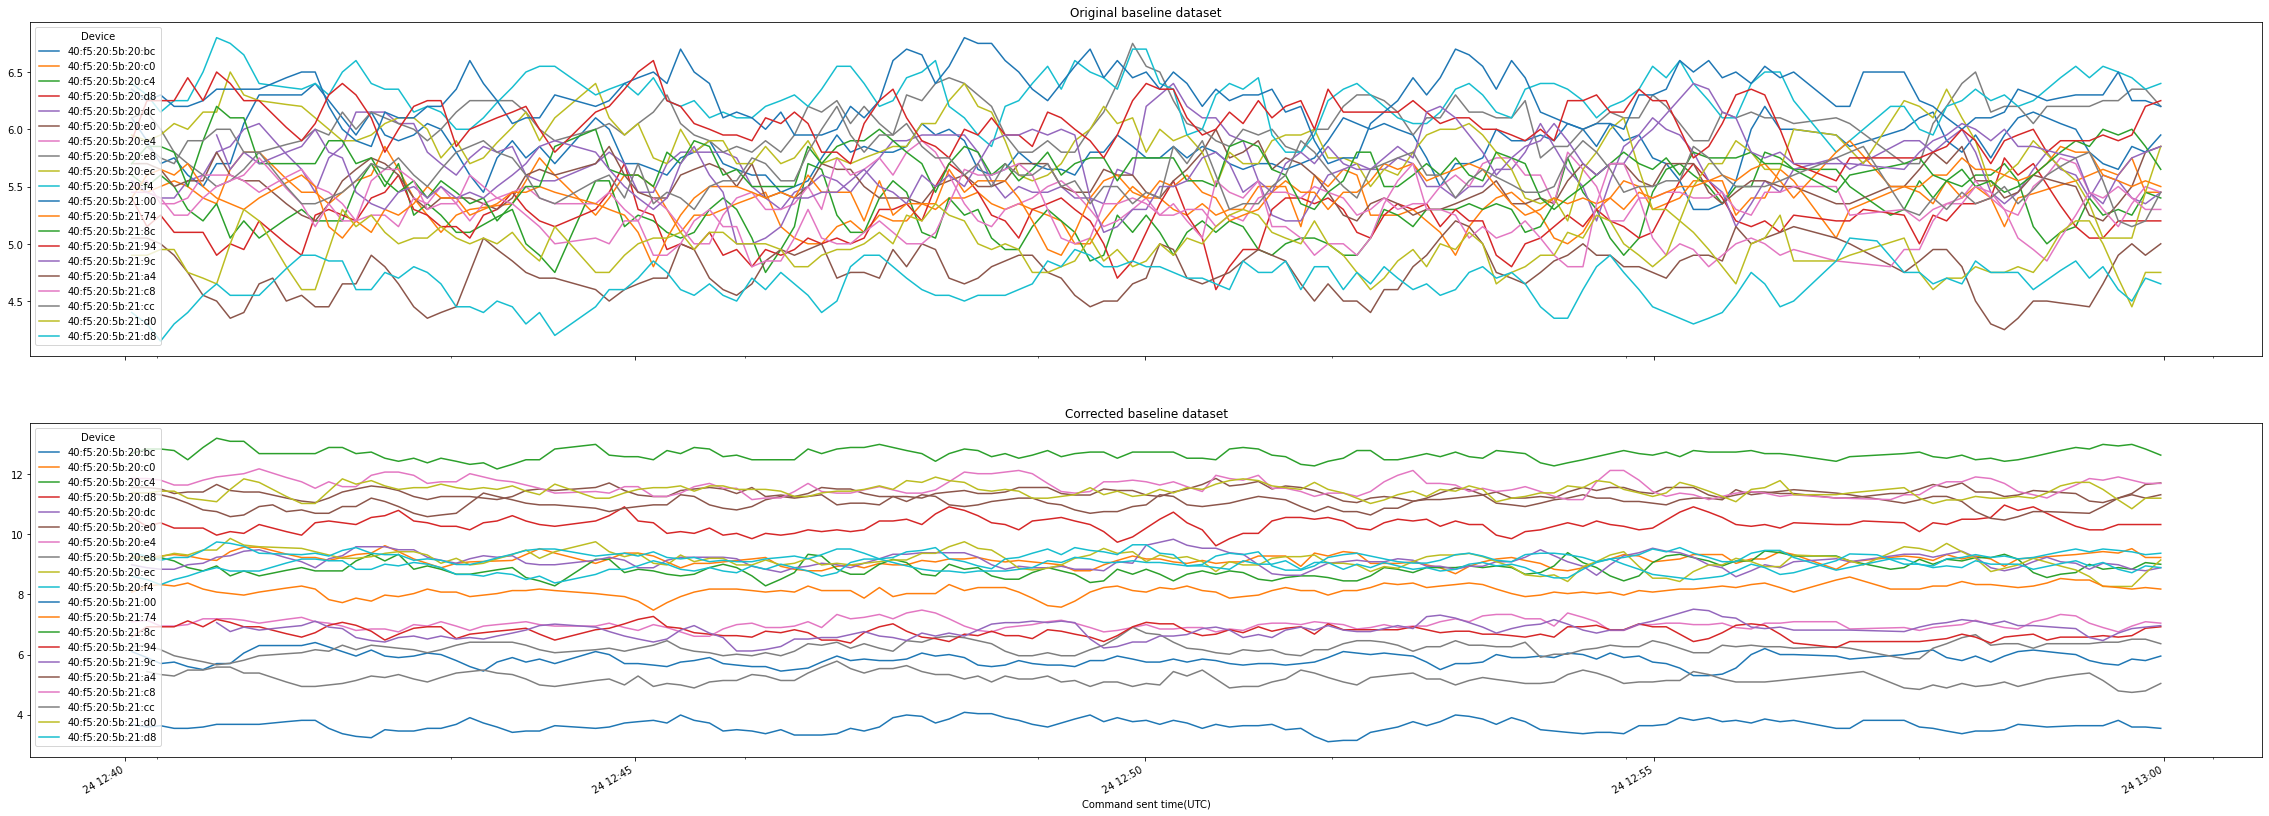

In [91]:
fig, axarr = plt.subplots(2, figsize=(40,15), sharex=True)

masked_baseline_df.plot.line(ax=axarr[0], title = "Original baseline dataset")
corrected_baseline_df.plot.line(ax=axarr[1], title = "Corrected baseline dataset");

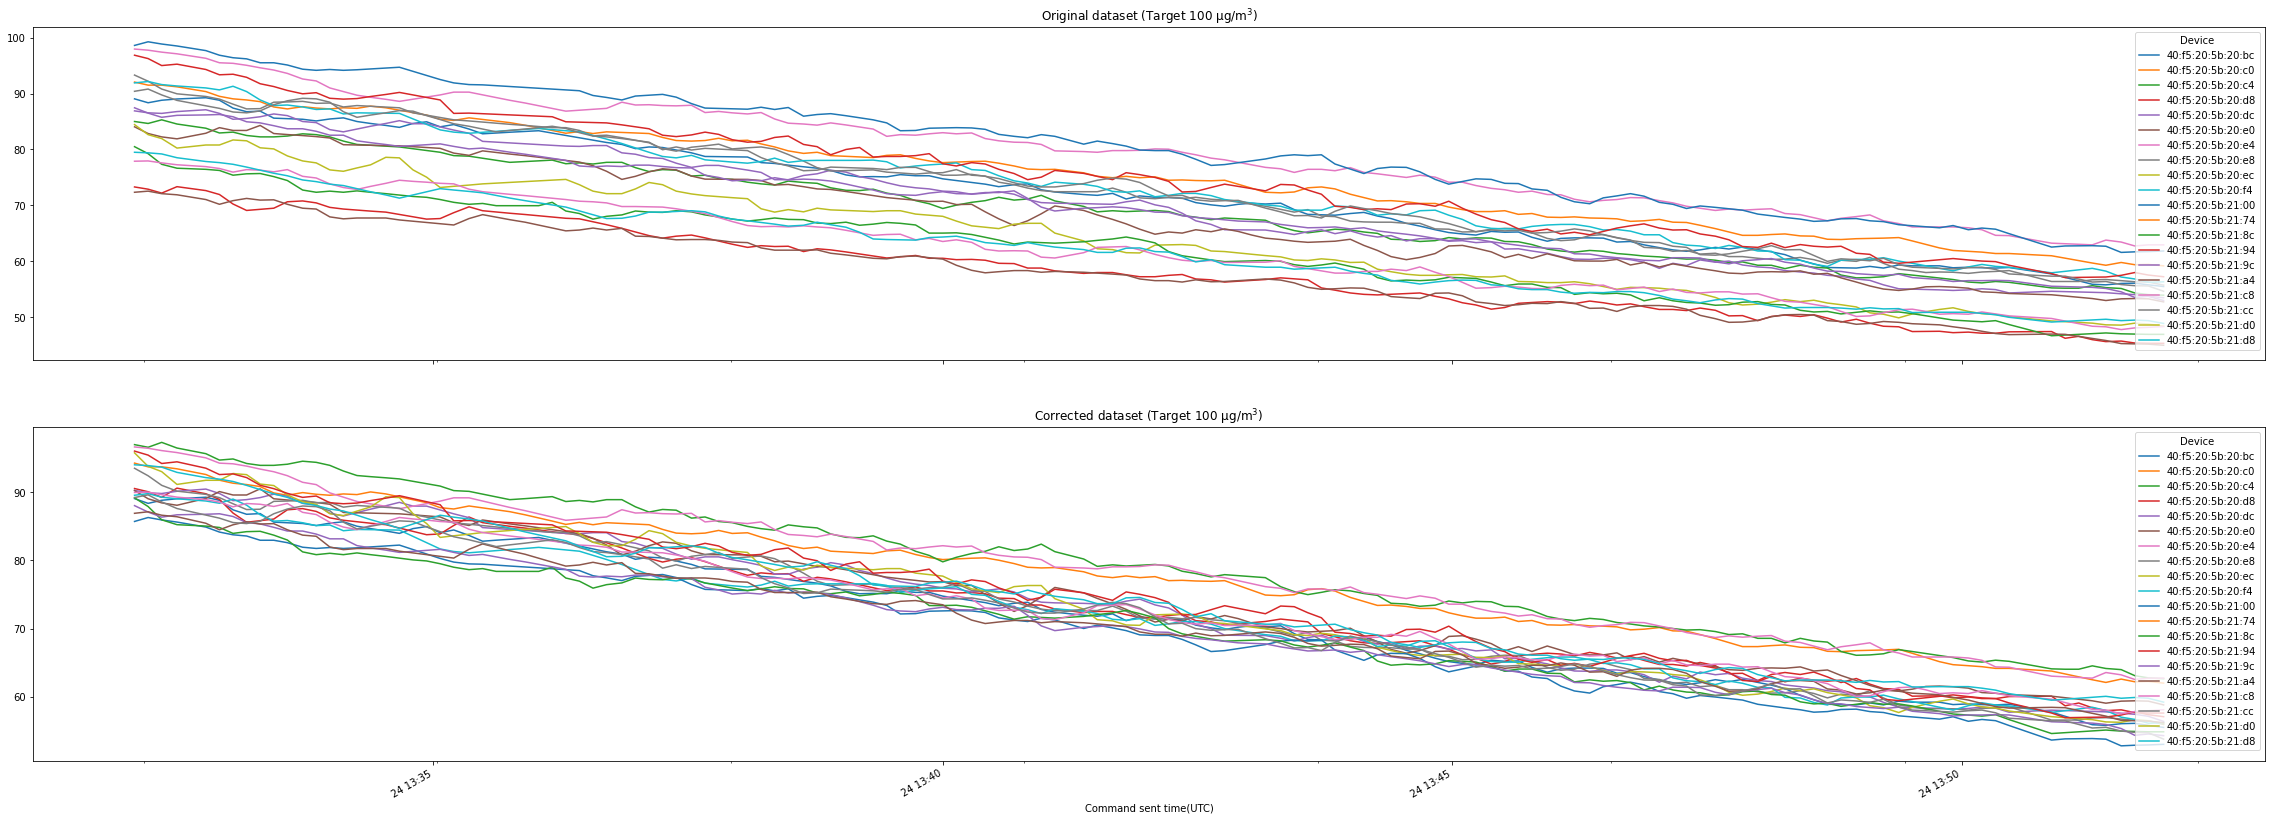

In [104]:
fig, axarr = plt.subplots(2, figsize=(40,15), sharex=True)
masked_target_100ug_df.plot.line(ax=axarr[0], title = "Original dataset (Target 100 $\mathregular{μg/m^{3}}$)")
corrected_100ug_df.plot.line(ax=axarr[1], title = "Corrected dataset (Target 100 $\mathregular{μg/m^{3}}$)");

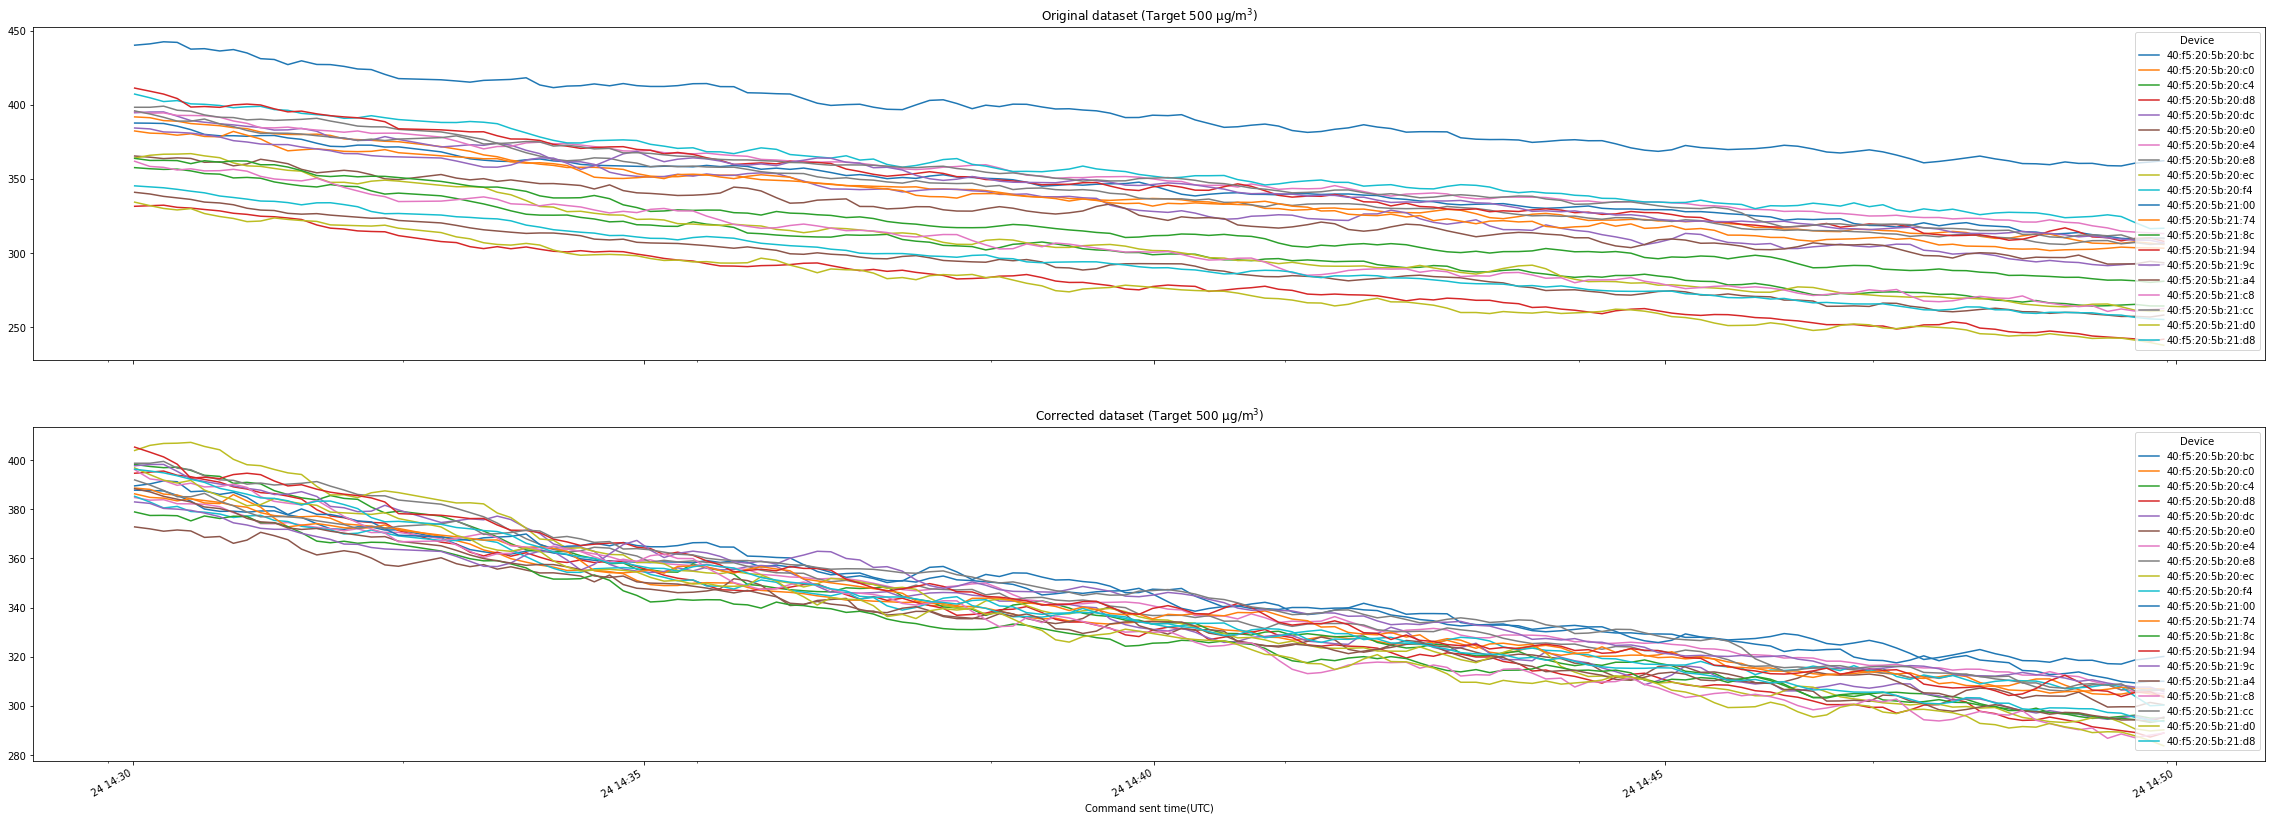

In [89]:
fig, axarr = plt.subplots(2, figsize=(40,15), sharex=True)
masked_target_500ug_df.plot.line(ax=axarr[0], title = "Original dataset (Target 500 $\mathregular{μg/m^{3}}$)");
corrected_500ug_df.plot.line(ax=axarr[1], title = "Corrected dataset (Target 500 $\mathregular{μg/m^{3}}$)");

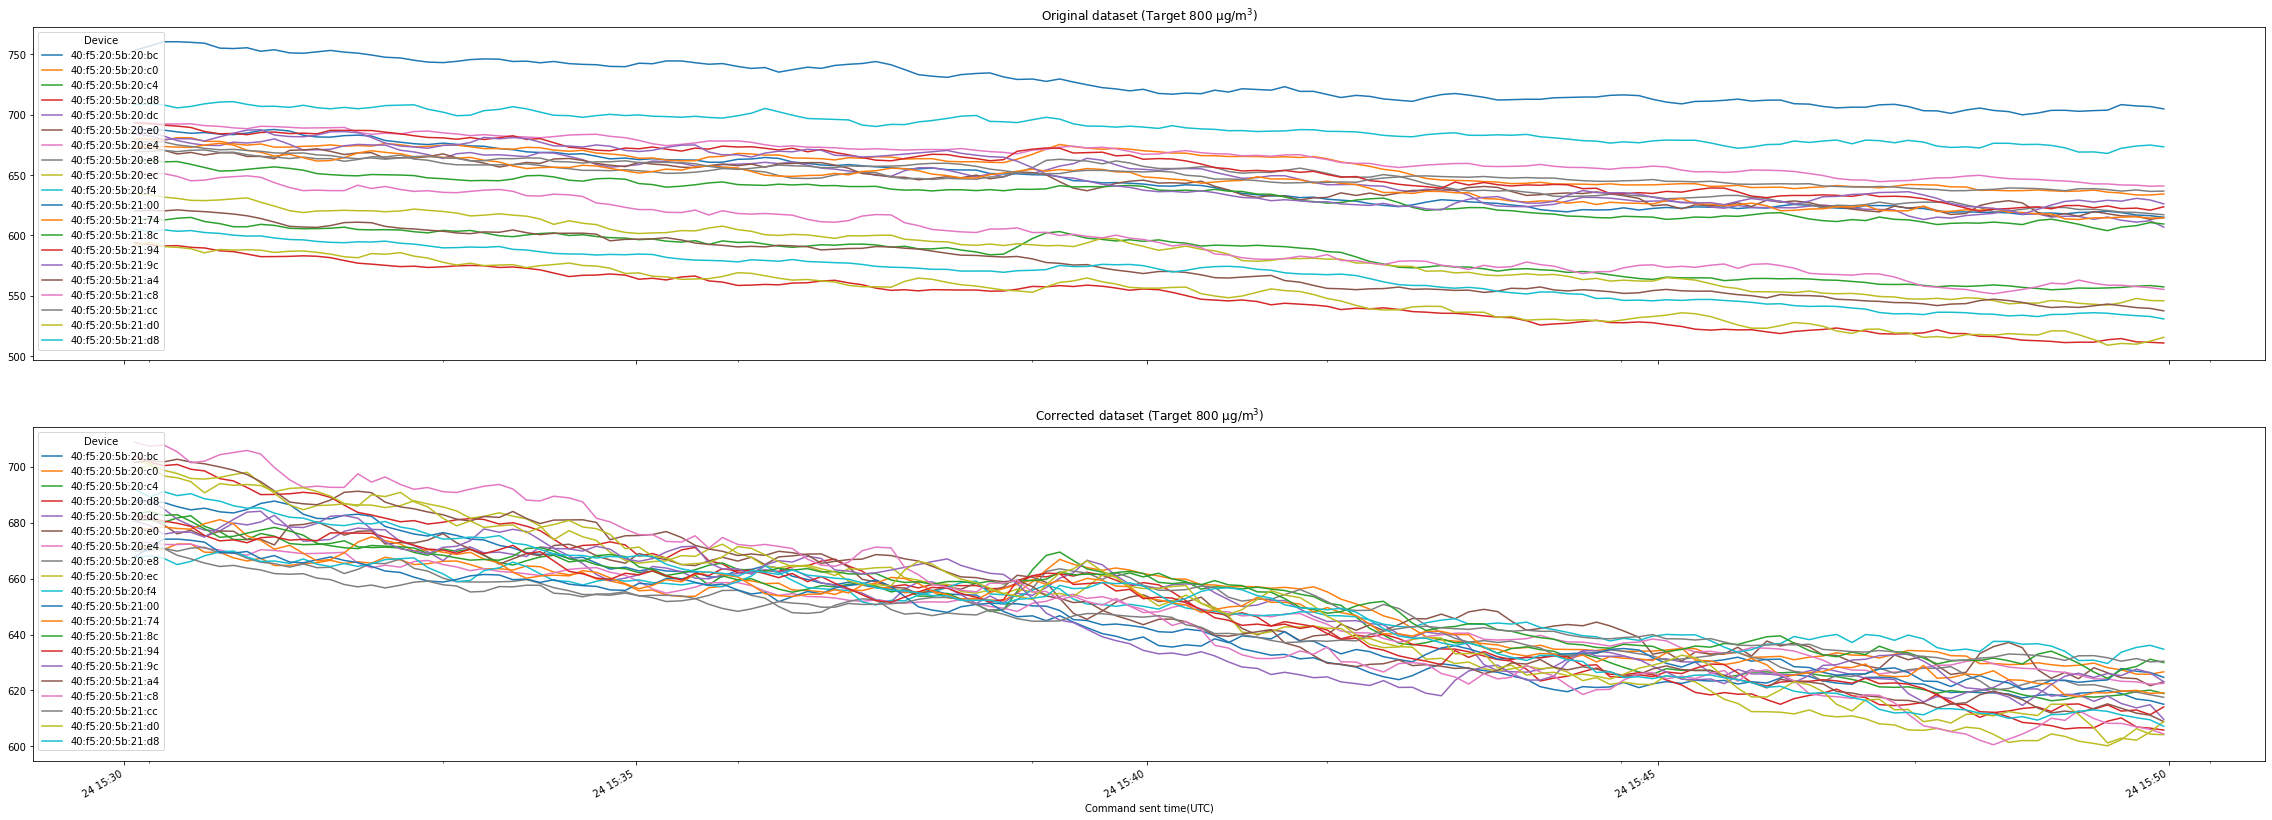

In [88]:
fig, axarr = plt.subplots(2, figsize=(40,15), sharex=True)
masked_target_800ug_df.plot.line(ax=axarr[0], title = "Original dataset (Target 800 $\mathregular{μg/m^{3}}$)");
corrected_800ug_df.plot.line(ax=axarr[1], title = "Corrected dataset (Target 800 $\mathregular{μg/m^{3}}$)");

# Finalize analysis of normalized data

In [99]:
concat_corrected_df = pd.concat([corrected_baseline_df, corrected_100ug_df, corrected_500ug_df, corrected_800ug_df])

In [100]:
concat_corrected_df.head()

Device                  40:f5:20:5b:20:bc  ...  40:f5:20:5b:21:d8
Command sent time(UTC)                     ...                   
2021-06-24 12:40:04                  6.10  ...           8.609283
2021-06-24 12:40:13                  5.90  ...           8.495577
2021-06-24 12:40:21                  5.70  ...           8.325019
2021-06-24 12:40:29                  5.75  ...           8.495577
2021-06-24 12:40:37                  5.60  ...           8.609283

[5 rows x 20 columns]

## Apply regression between median device and normalized data

In [101]:
y = concat_corrected_df
x = concat_df[median_device]

#Add constant term
x = sm.add_constant(x)

#Create the model and fit, ignore any missing values represented by Nan
model = sm.OLS(endog=y, exog=x, missing='drop')
results = model.fit()

#Print the model parameters
corrected_coeffs = results.params
corrected_coeffs.columns = concat_corrected_df.columns
corrected_coeffs

Device             40:f5:20:5b:20:bc  ...  40:f5:20:5b:21:d8
const                            0.0  ...          -0.494259
40:f5:20:5b:20:bc                1.0  ...           1.000000

[2 rows x 20 columns]

Save normalized regression coefficients

In [102]:
corrected_coeffs.to_csv("corrected_regression_coefficients.csv", encoding="utf8")